In [1]:
#Importing the basic librarires for building model - classification

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,r2_score
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 

from sklearn.preprocessing import LabelEncoder,StandardScaler

In [2]:
df= pd.read_csv("D:\\data science\\Project 2\\hotel_reviews_processed.csv",encoding='latin-1')
df

,Unnamed: 0,Rating,clean_word,subjectivity,polarity,analysis
0,0,4,nice hotel expens park got good deal stay hote...,0.749286,0.353265,Positive
1,1,2,ok noth special charg diamond member hilton de...,0.495012,0.311808,Positive
2,2,3,nice room experi hotel monaco seattl good hote...,0.591511,0.294513,Positive
3,3,5,uniqu great stay wonder time hotel monaco loca...,0.640278,0.455556,Positive
4,4,5,great stay great stay went seahawk game awesom...,0.537987,0.424351,Positive
...,...,...,...,...,...,...
20486,20486,5,best kept secret rd time stay charm star ca be...,0.534444,0.195152,Positive
20487,20487,4,great locat price view hotel great quick place...,0.625000,0.516667,Positive
20488,20488,2,ok look nice modern outsid desk staff particul...,0.499026,0.263874,Positive
20489,20489,1,hotel theft ruin vacat hotel open sept guest w...,0.458975,0.119859,Positive


In [3]:
df = df.drop("Unnamed: 0",axis=1)

In [4]:
LE = LabelEncoder()
  
df['analysis']= LE.fit_transform(df['analysis'])
  
df['analysis'].unique()

array([2, 0, 1])

In [5]:
df

,Rating,clean_word,subjectivity,polarity,analysis
0,4,nice hotel expens park got good deal stay hote...,0.749286,0.353265,2
1,2,ok noth special charg diamond member hilton de...,0.495012,0.311808,2
2,3,nice room experi hotel monaco seattl good hote...,0.591511,0.294513,2
3,5,uniqu great stay wonder time hotel monaco loca...,0.640278,0.455556,2
4,5,great stay great stay went seahawk game awesom...,0.537987,0.424351,2
...,...,...,...,...,...
20486,5,best kept secret rd time stay charm star ca be...,0.534444,0.195152,2
20487,4,great locat price view hotel great quick place...,0.625000,0.516667,2
20488,2,ok look nice modern outsid desk staff particul...,0.499026,0.263874,2
20489,1,hotel theft ruin vacat hotel open sept guest w...,0.458975,0.119859,2


In [6]:
# now we need change the new word to number - array using CountVectorizer

tfidv= TfidfVectorizer()
X=tfidv.fit_transform(df["clean_word"]).toarray()
Y=df["analysis"]

In [7]:
X.shape,Y.shape

((20491, 35692), (20491,))

In [8]:
#Normalizing the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
MM_Scale = MM.fit_transform(X)
MM_Scale
MM_Scale = pd.DataFrame(MM_Scale)
MM_Scale[0].describe()

count    20491.000000
mean         0.000237
std          0.010889
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: 0, dtype: float64

In [9]:
# split the data train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)



In [10]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((15368, 35692), (5123, 35692), (15368,), (5123,))

### Model Building 

#### Logistic Regression

In [11]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)

LogisticRegression()

In [12]:
LR_pred_train=LR.predict(X_train)
LR_pred_test=LR.predict(X_test)
LR_train_acc=accuracy_score(LR_pred_train,Y_train)
LR_test_acc=accuracy_score(LR_pred_test,Y_test)

In [13]:
print(LR_train_acc)
print(LR_test_acc)

0.9679854242581989
0.9564708178801483


              precision    recall  f1-score   support

           0       0.21      0.92      0.34        51
           1       0.00      0.00      0.00         0
           2       1.00      0.96      0.98      5072

    accuracy                           0.96      5123
   macro avg       0.40      0.63      0.44      5123
weighted avg       0.99      0.96      0.97      5123

Accuracy of LR Model: 95.64708178801483%


Text(0.5, 1.0, 'Confusion Matrix for LR Model')

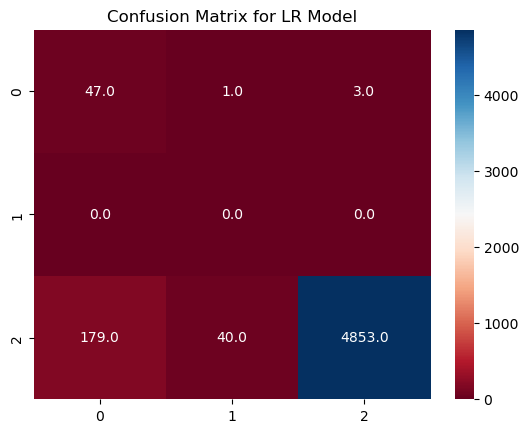

In [14]:
acc = accuracy_score(LR_pred_test, Y_test)
report = classification_report(LR_pred_test, Y_test)
print(report)
cm = confusion_matrix(LR_pred_test, Y_test)
#np.set_printoptions(precision=0.01)
print("Accuracy of LR Model: {}%".format(acc*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for LR Model")

#### Decision Tree Algorithm

In [15]:
DT = DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_leaf=3)
DT.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=3)

In [16]:
DT_pred_train=DT.predict(X_train)
DT_pred_test=DT.predict(X_test)
DT_train_acc=accuracy_score(DT_pred_train,Y_train)
DT_test_acc=accuracy_score(DT_pred_test,Y_test)

In [17]:
print(DT_train_acc)
print(DT_test_acc)

0.96538261322228
0.9490532890884248


              precision    recall  f1-score   support

           0       0.22      0.53      0.31        92
           1       0.00      0.00      0.00         0
           2       0.99      0.96      0.97      5031

    accuracy                           0.95      5123
   macro avg       0.40      0.50      0.43      5123
weighted avg       0.98      0.95      0.96      5123

Accuracy of DT Model: 94.90532890884248%


Text(0.5, 1.0, 'Confusion Matrix for DT Model')

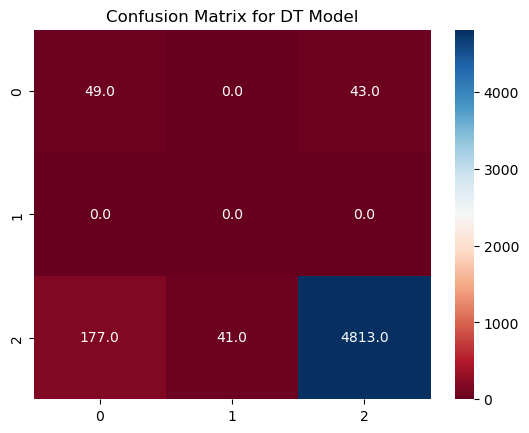

In [18]:
acc = accuracy_score(DT_pred_test, Y_test)
report = classification_report(DT_pred_test, Y_test)
print(report)
cm = confusion_matrix(DT_pred_test, Y_test)
#np.set_printoptions(precision=0.01)
print("Accuracy of DT Model: {}%".format(acc*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for DT Model")

#### Random Forest Classifier

In [19]:
RF = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=9)
RF.fit(X_train,Y_train)

RandomForestClassifier(max_depth=9)

In [20]:
RF_pred_train=RF.predict(X_train)
RF_pred_test=RF.predict(X_test)
RF_train_acc=accuracy_score(RF_pred_train,Y_train)
RF_test_acc=accuracy_score(RF_pred_test,Y_test)

In [21]:
print(RF_train_acc)
print(RF_test_acc)

0.9486595523165018
0.9478821003318368


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.95      0.97      5123

    accuracy                           0.95      5123
   macro avg       0.33      0.32      0.32      5123
weighted avg       1.00      0.95      0.97      5123

Accuracy of RF Model: 94.78821003318369%


Text(0.5, 1.0, 'Confusion Matrix for RF Model')

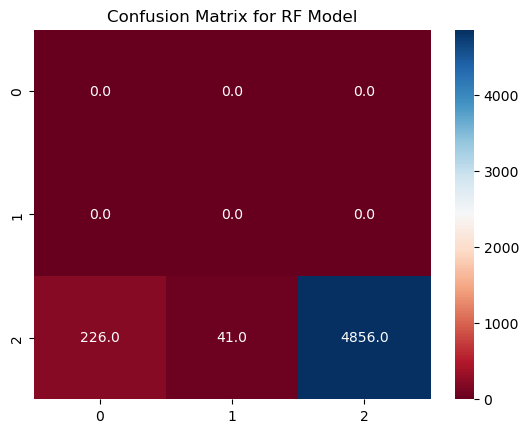

In [22]:
acc = accuracy_score(RF_pred_test, Y_test)
report = classification_report(RF_pred_test, Y_test)
print(report)
cm = confusion_matrix(RF_pred_test, Y_test)
#np.set_printoptions(precision=0.01)
print("Accuracy of RF Model: {}%".format(acc*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for RF Model")

####  Support Vector Machines

In [ ]:
SVM = SVC()
SVM.fit(X_train,Y_train)

In [ ]:
SVM_pred_train=SVM.predict(X_train)
SVM_pred_test=SVM.predict(X_test)
SVM_train_acc=accuracy_score(SVM_pred_train,Y_train)
SVM_test_acc=accuracy_score(SVM_pred_test,Y_test)

In [ ]:
print(RF_train_acc)
print(RF_test_acc)

In [ ]:
acc = accuracy_score(SVM_pred_test, Y_test)
report = classification_report(SVM_pred_test, Y_test)
print(report)
cm = confusion_matrix(SVM_pred_test, Y_test)
#np.set_printoptions(precision=0.01)
print("Accuracy of SVM Model: {}%".format(acc*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for SVM Model")